#Analytics 512 Homework 5

### Arif Ali
### 03/24/2016

#Analytics 512 HW #5

##Exercise 6.8 2b

The ridge regression relative to leasr squares is: less flexible and hence will give improved prediction accu- racy when its increase in bias is less than its decrease in variance.
As $\lambda$ increases, the flexibility of the ridge regression fit decreases.

##Exercise 6.8 3

### Part A
Decrease Steadily

### Part B
Decrease initially, and then eventually start increasing in a U shape

### Part C
Increase Steadily.

##Exercise 6.8 9

### Part A

In [1]:
library(ISLR)
attach(College)
train = sample(nrow(College), nrow(College)*.70, replace = F)
training = College[train,]
testing = College[-train,]

### Part B

In [2]:
college.lm = lm(Apps~.,data=training)
est.lm = predict(college.lm, testing)
#MSE
mean((testing$Apps - est.lm)^2)

[1] 2029061

### Part C

In [3]:
library(glmnet)
grid=10^seq(10,-2,length=100)

x=model.matrix(Apps~., data = training)
y = training$Apps
college.ridge = cv.glmnet(x,y,alpha=0,lambda=grid)
ridge.pred = predict(college.ridge, 
                     newx=model.matrix(Apps~., data = testing), 
                     s=college.ridge$lambda.min)
mean((testing$Apps - ridge.pred)^2)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-2



[1] 2139622

In [4]:
college.ridge$lambda.min

[1] 14.17474

### Part D

In [5]:
college.lasso = cv.glmnet(x,y,alpha=1,lambda=grid)
college.lasso$lambda.min

[1] 3.511192

In [6]:
lasso.pred = predict(college.lasso, 
                     newx=model.matrix(Apps~., data = testing), 
                     s=college.lasso$lambda.min)
mean((testing$Apps - lasso.pred)^2)

[1] 2053941

##Exercise 6.8 11

In [7]:
library(MASS)
Boston$crim = log10(as.numeric(Boston$crim))
dim(Boston)

[1] 506  14

### Part A

In [8]:
library(leaps)
Boston.bestsubset = regsubsets(crim~.,data=Boston)

In [13]:
predict.regsubsets <- function(object, newdata, id, ...) {
    form <- as.formula(object$call[[2]])
    mat <- model.matrix(form, newdata)
    coefi <- coef(object, id = id)
    xvars <- names(coefi)
    mat[, xvars] %*% coefi
}

k=10
set.seed (1)
folds=sample(1:k,nrow(Boston),replace=TRUE)
cv.errors=matrix(NA,k,13, dimnames=list(NULL, paste(1:13)))

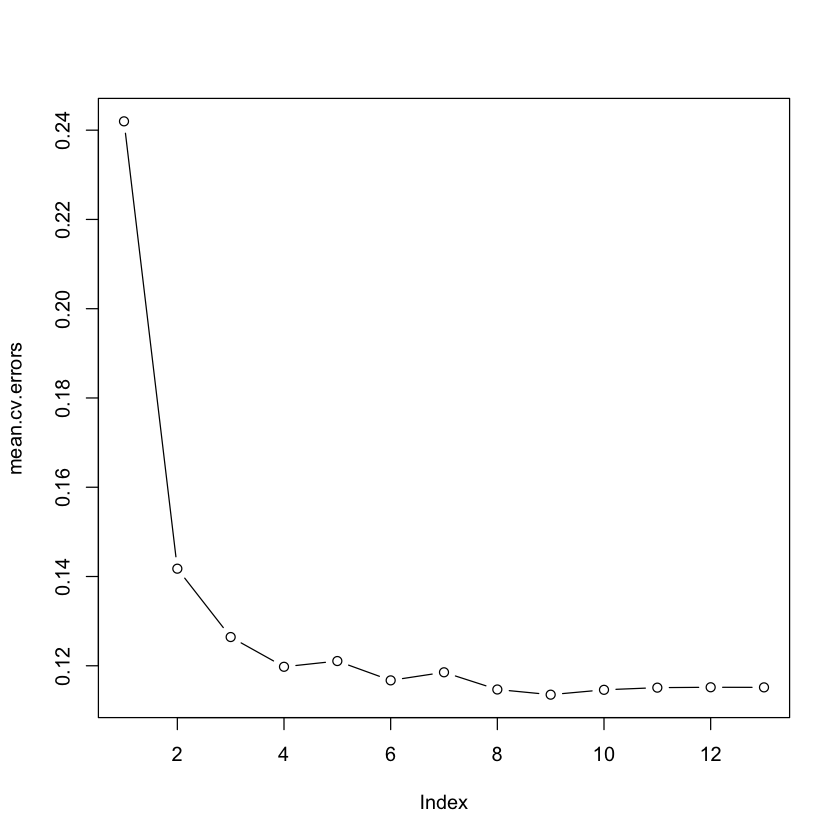

In [18]:
for(j in 1:k){
    best.fit = regsubsets(crim~.,data=Boston[folds!=j,],
                        nvmax=13)
    for(i in 1:13){
        pred = predict(best.fit,Boston[folds==j,],id=i)
        cv.errors[j,i] = mean( (Boston$crim[folds==j]-pred)^2)
        }
    }
mean.cv.errors=apply(cv.errors ,2,mean)
plot(mean.cv.errors ,type='b')

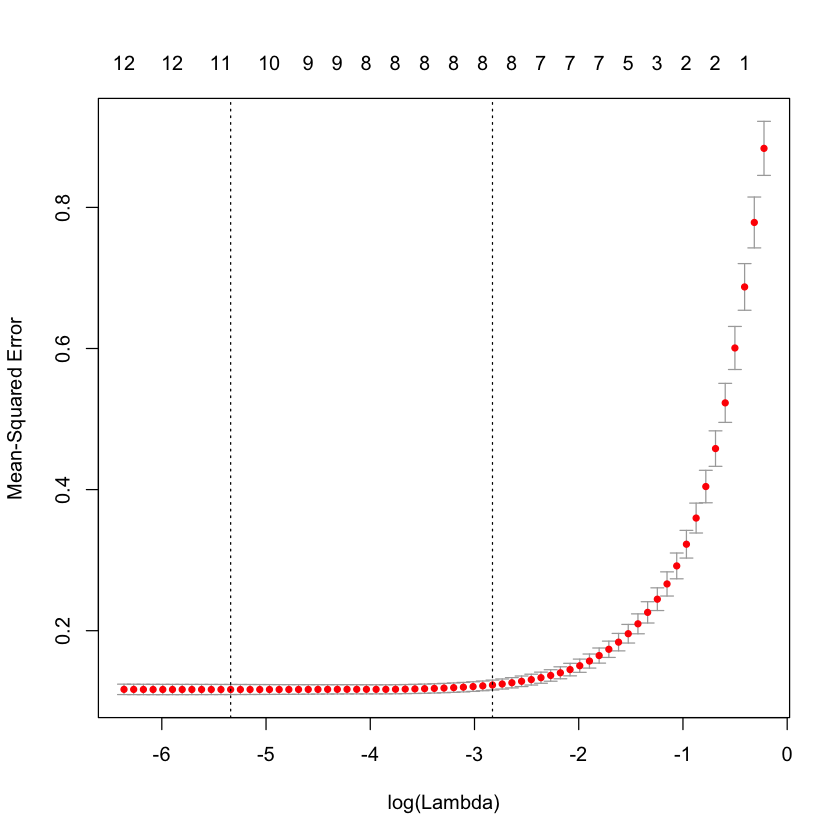

In [21]:
cv.lasso = cv.glmnet(model.matrix(crim ~ ., Boston), 
                    Boston$crim, alpha = 1, type.measure = "mse")
plot(cv.lasso)

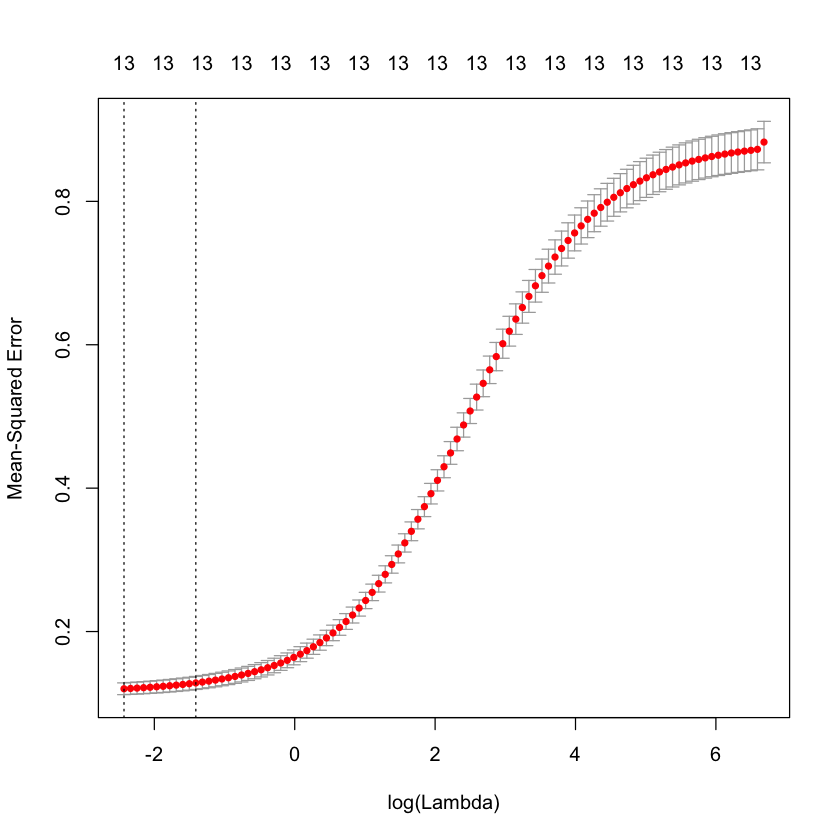

In [22]:
cv.ridge = cv.glmnet(model.matrix(crim ~ ., Boston), 
                    Boston$crim, alpha = 0, type.measure = "mse")
plot(cv.ridge)

### Part B